## Principal Component Analysis - Applied to Handwritten Digit Recognition


## If you haven't done this:
        > pip install mpld3

In [5]:
%matplotlib inline

''' Initial Imports'''
# The following should enable zoom-in and rotation of 3d plots.
# pip install mpld3, if necessary.  Note: it messes up the colorbar just a bit.
# import mpld3
# mpld3.enable_notebook()

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#-------> new import

from sklearn.decomposition import PCA

(200, 2)


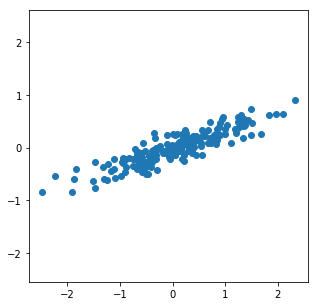

In [6]:
'''

Generate correlated random numbers (say temperature and ice-cream sales)

Turns out if you use r1 = np.random.randn(2, 2) you get a weak anti-correlation


'''

np.random.seed(1)
# make a 2x200 matrix where for each column, the randomness is also 
# spread out in the y-direction.

r1 = np.random.rand(2, 2)
r2 = np.random.randn(2, 200)

X = np.dot(r1, r2).T

x1 = X[:, 0]
x2 = X[:, 1]

print(X.shape)
plt.figure(figsize = (5, 5))
plt.plot(x1, x2, 'o')
# 'equal' forces the units of x and y to be the same,
# it's equivalent to plt.axis(-lim, lim, -lim, lim)
plt.axis('equal')
plt.show()

## We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution.

## First let's understand the data variances.

In [7]:
var1 = np.var(x1)
var2 = np.var(x2)
print('Variance along x1 and x2:', var1, var2)
print('Total variance:', var1 + var2)

Variance along x1 and x2: 0.678766717934 0.09833763148
Total variance: 0.777104349414


In [8]:
'''

In the following note that the two pca components are unit vectors:

[0.94446029,  0.32862557]

and 

[0.32862557, -0.94446029];

check for yourself!

'''
# instantiation of a pca object
# n_components has to be equal to or smaller than the
# dimensionality of the data
pca = PCA(n_components=2)
# It has a method called fit() -- which finds the PCA components
pca.fit(X)
# percentage of the variance.
print(pca.explained_variance_)
print("Total variance:", pca.explained_variance_.sum())
print('Percentage of variance accounted for:', pca.explained_variance_ratio_)
# principal axes
print(pca.components_)

[ 0.7625315  0.0184779]
Total variance: 0.781009396396
Percentage of variance accounted for: [ 0.97634101  0.02365899]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


## Breakout Exercise

- ### Plot the unit vector (0.944,  0.329) 

- ### If you succeed, also plot the unit vector (0.329, -0.944)

### These two lines should help you with the visualization:

- ### makes sure the plotting area is a square
        plt.figure(figsize = (5, 5))
        
- ### makes sure the tick scales along x and y are the same         
        plt.axis('equal')


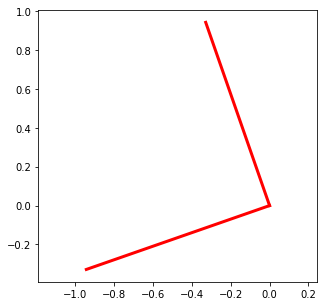

In [9]:
plt.figure(figsize = (5, 5))
plt.axis('equal')


u0 = [-0.944, -0.329]
plt.plot([0, u0[0]], [0, u0[1]], 'r-', lw=3)

u1 = [-0.329, 0.944]
plt.plot([0, u1[0]], [0, u1[1]], 'r-', lw=3)
plt.show()

# Plot these two vectors on top of the data set -- using the eigenvalues as the length for each.

## To see what these numbers mean, let's view them as vectors plotted on top of the data:

sigma, vector 0.873230496995 [-0.94446029 -0.32862557]
sigma, vector 0.135933423092 [-0.32862557  0.94446029]


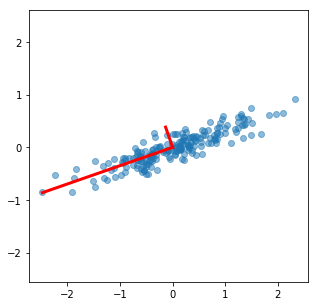

In [10]:
'''
Again remember that the two pca components are unit vectors:

[0.94446029,  0.32862557]

and 

[0.32862557, -0.94446029];


- PCA axis (pca.components_): Eigevectors (unit vectors) -- gives direction of PCA vector
    
    0th pca axis: (u0[0], u0[1]), or the line: [0, u0[0]], [0, u0[1]] 
    1st pca axis: (u1[0], u1[1])
    ...


- PCA explained_variance (pca.explained_variance_): Eigenvalues -- gives length of PCA vectors

Remember: 3 sigma should contain 99.73% of the data.

'''

plt.figure(figsize = (5, 5))
plt.plot(x1, x2, 'o', alpha=0.5)
# below v are the principal axes; and var indicates the variance accounted for 
# in each direction.
for var, unit_vec in zip(pca.explained_variance_, pca.components_):
    sigma = np.sqrt(var)
    print('sigma, vector', sigma, unit_vec)
    # Each component of vector gives the variance in each of the two principal directions
    # Remember, sqrt(variance) = std dev, or 1 sigma; thus, 3*sqrt(length) = 3 sigma,
    # or 99.73% of all data in either direction
    u = unit_vec * 3 * sigma
    
    ## the vector (u[0], u[1])
    ## is in the direction of one of the eigenvectors and
    ## the for loop iterate and plots both eigenvector;
    ## the way to plot each vectors is the line below
    plt.plot([0, u[0]], [0, u[1]], 'r-', lw=3)
plt.axis('equal')
plt.show()



## Notice that one vector is longer than the other. This tells us that that direction in the data is in some sense more "important" than the other direction.


## The explained\_variance\_ (eigenvalue) quantifies this measure of "importance" in each direction.

## Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance -- for the vast majority of the data points, they can be separated out along the 0th principal axis alone!

## Breakout Exercise:

- ### Rotate the axes so that the new x-axis lie along u1 and y-axis along u2; plot the data in the new coordinate system

- ### Project the data onto the u0 direction -- plot the data in the horizontal direction

- ### Project the data onto the u1 direction -- plot the data in the vertical direction

(200, 2)
(200, 1)


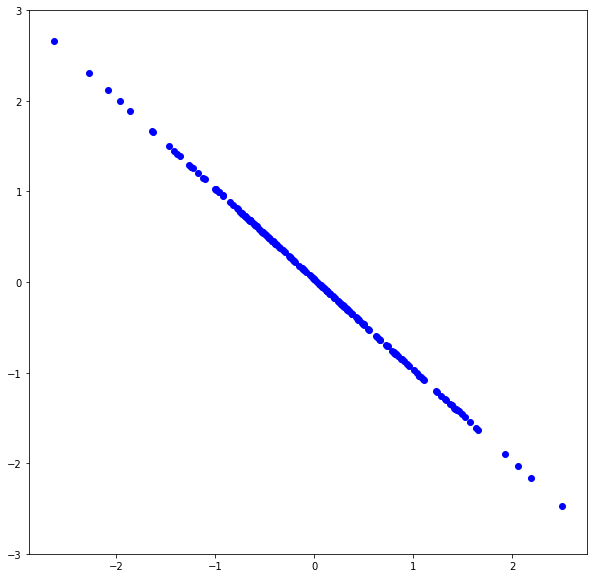

In [11]:
''' 

This shows what pca.fit_transform() does -- 
because I do this explicitly here and compared with what one gets
from the method fit_transform().

I need to redo the plot -- right now it's plot against the index. 
If I do a histogram, I should be able to see the variance that corresponds to 
the 1st principal direction.

'''

# 1 component PCA
pca = PCA(n_components=1)

# fit_transform finds the PCA components 
# and rotate the data to the principal axes
X_trans = pca.fit_transform(X)
# I can construct the transformed X by hand, and


## ----> I need to understand how the transformation is 
## accomplished by this step
X_trans_ByHand = 0.944*x1 + 0.329*x2

print(X.shape)
print(X_trans.shape)

plt.figure(figsize = (10, 10))
plt.plot(X_trans_ByHand, X_trans, 'bo')
plt.ylim([-3, 3])
plt.show()

Shape of original data: (200, 2)
Shape of projected data (with 95% of the variance accounted for: (200, 1)


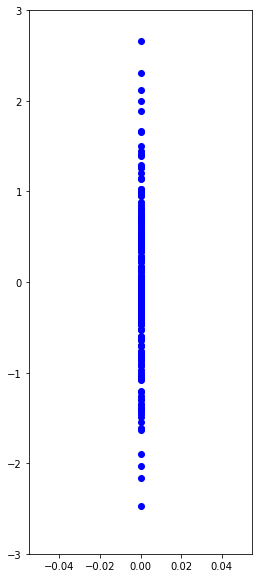

In [12]:
''' 
Or you can let the function PCA decide how many components to keep
'''

# keep 95% of variance
pca95 = PCA(0.95) 
# fit_transform finds the PCA components 
# and rotate the data to the principal axes
X_trans = pca95.fit_transform(X)

print('Shape of original data:', X.shape)
print('Shape of projected data (with 95% of the variance accounted for:', X_trans.shape)

plt.figure(figsize = (4, 10))
# if you tilt your head so that the symmetry axis of your face 
# is lined up with the 0th principal axis, and ignore 
# (or compress the data in the direction of) the 1st principel axis,
# then you will see this
plt.plot(np.zeros(len(X_trans)), X_trans, 'bo')
plt.ylim([-3, 3])
plt.show()

## By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

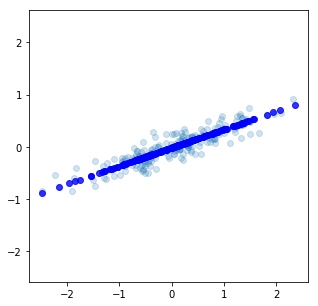

In [13]:
# inverse_transform takes you back to the original axes.
X_new = pca95.inverse_transform(X_trans)
plt.figure(figsize = (5, 5))
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'bo', alpha=0.8)
plt.axis('equal')
plt.show()

## The light points are the original data, while the dark points are the projected version.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" feature of the data is maintained -- and we can still separate nearly all the data points from each other, and we've compressed the data by 50%!  That is, we can replace the semi-transparent data points with the solid data points, and these points contain 95% of the information.  

### [For the physics students: Think in terms of the moment of inertia: for certain experiments, an object shaped like the outline of the semi-transparent data points behaves in very much the same way as an infinitely thin "needle".]

## This is **dimensionality reduction**: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting a mathematical/statistical model to the data.

## Application of PCA to *Handwritten* Digits

### The projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.  Let's take a quick look at the application of PCA to the data of handwritten digits.

## sklearn.datasets has a data set of 1797 images of the 10 digits written in different ways.

## All images are represented as 8 x 8, 4-bit gray scale images (i.e., the pixel values vary form 0 to 15.) 

## The digits are stored as *1-dimensional* integer arrays, each with a length of 64.


### Try this:
        print(X[0].shape)

### and 

        print(X[0])


### If you want to see the image of a digit, you need to do 

        arr_2d = X[0].reshape(8, 8)

### You can verify

        print(arr_2d.shape)


## To make your life easier, the sklearn people provides an attribute that contains all the 2d images of the handwritten digits:

        dig_im = dig_data.images

        print(dig_im[0].shape)

## OK, let's do this!

### First the data (the images for the handwritten digits)

In [14]:
from sklearn.datasets import load_digits
dig_data = load_digits()
X = dig_data.data


## Mini-breakout: 

- ### Show the shape of the X and print the shape of each element in X.  Each element corresponds to a handwritten digit

- ### Convert one of the elements in X (say the 0th) into the right shape and show the image that corresponds to that element.

- ### Print the shape of the attribute dig_data.images.  Show the 0th image.

## Another important attribute: target

<class 'numpy.ndarray'> float64 (1797, 64)
<class 'numpy.ndarray'> int64 (1797,)
digits: [4 0 5]


AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

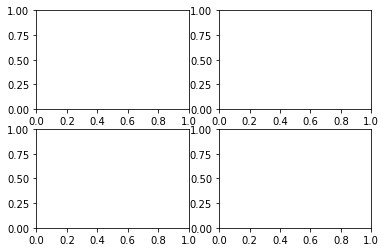

In [15]:
# digits: the values of the digits.
digits = dig_data.target

print(type(X), X.dtype, X.shape)
print(type(digits), digits.dtype, digits.shape)

# this shows the first 3 digit and what the values are
print('digits:', digits[100:103])
fig, axes = plt.subplots(2, 2)
axes[0].imshow(X[100].reshape((8, 8)), cmap = 'binary')
axes[1].imshow(X[101].reshape((8, 8)), cmap = 'binary')
axes[2].imshow(X[102].reshape((8, 8)), cmap = 'binary')
plt.show()

## Breakout: Write a function and use it to show the first 25 images in the handwritten digit data set and show these images in a 5 x 5 grid

- ### Call it: plot_digits(X, nside = 5)
- ### To plot the images: plot_digits(X)

## Question: How does our brain translate an image (of a digit) into a number?


- ### From experience you know that you need to see a number written in many different ways in order to recognize all its different variations (a child who sees the digits for the first time will likely only recognize the printed version, and not necessarily a particular handwritten version).

- ### With experirence, you know that you don't need a very high resolution of the image to recognize a digit -- as shown above, 8x8 is usually good enough.

- ### Further, you know that you don't know to memorize the location of every pixel for a given digit.  What exactly is the brain's algorithm to efficiently translate an image into a number is not totally clear -- 

- ### _but one thing you can be sure of: It's a lot more efficient than memorizing the exact location of every digit in all its commonly occuring variations!!!!_

## Every time you brain sees a new variation of how a digit can be written, its ability of recognizing that digit increases -- in other words, you have to _train_ your brain to recognize a digit.

## This is true for a computer algorithm.  It doesn't matter how clever the algorithm is, it has to be "trained".  It has to "see" the different ways a digit can be written, or,

## _Data beats algorithm_


## But it would be very inefficient if it tries to compare a new digit image with the stored position of every pixel and uses that as a way to recognize the new image. 

# _Try PCA_ 

In [19]:
"""
First, try projecting from 64 to 2 dimensions

Note you can turn whiten on and off -- the default is off.

pca = PCA(2, whiten = False)  

We will talk about the meaning whiten later.
"""
dig_data = load_digits()
X = dig_data.data

#pca = PCA(2, whiten = True)  
pca = PCA(2)  

Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


Shape of 2 component PCA (1797, 2)
digits.shape (1797,)


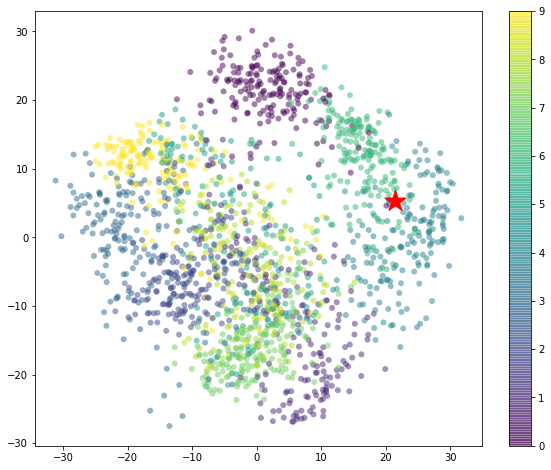

In [20]:
%matplotlib inline
'''

With 2 PCA components, there is "clustering", but not clear enought separate 
all the numbers cleanly.


For example, the star below shows where one of the digital image, 6, is.

****
Here talk about (allude to) the next step: how to draw nonlinear boundaries 
(not just straight lines, but curves and curved hyper-surfaces).
****

'''


plt.figure(figsize = (10, 8))
# c : color or sequence of color -- it's coded as the value of the digits.
# "nipy_spectral" is just a color scheme, you can try others, such as "rainbow"
sp2 = plt.scatter(Xproj[:, 0], Xproj[:, 1], c=digits, edgecolor='none', alpha=0.5) #, cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar(sp2)

print('Shape of 2 component PCA', Xproj.shape)
print('digits.shape', digits.shape)

select_dig = 6
plt.scatter(Xproj[select_dig, 0], Xproj[select_dig, 1], color = 'red', marker = '*', \
           s = 500, alpha=1.)

plt.show()



## Breakout: Do a 3 component PCA of Handwritten Digits

- ### Print out the percentage of variance explained by each of the 3 components
- ### Do a 3d scatter plot and you can now see unambigouously the same digital image, 6, belong to the "6"-cluster.


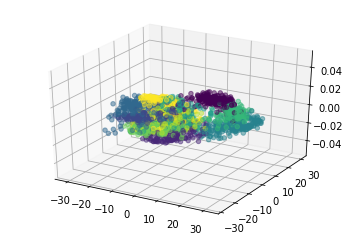

In [26]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm  #color map
import numpy as np
import matplotlib.pyplot as plt

Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)
print('Percentage of variance accounted for:', pca.explained_variance_ratio_)

fig = plt.figure()

sp3 = 
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xproj[:, 0], Xproj[:, 1], c=digits, alpha=0.5)
plt.colorbar(sp3)
plt.show()

## End of Week13-2